In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#print(np.__version__)
#print(pd.__version__)

In [387]:
data = pd.read_csv()

In [386]:
dict1 = pd.read_csv()

In [388]:
data.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
117687,59561,Tomohiro Kida,M,28.0,166.0,78.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Shooting,"Shooting Men's Air Pistol, 10 metres",NaN
120807,61120,Helga Klein (-Erny),F,20.0,164.0,55.0,Germany,GER,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's 4 x 100 metres Relay,Silver
53722,27556,Patrick Deneen,M,22.0,170.0,82.0,United States,USA,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Men's Moguls,NaN
152978,76773,Viktor Matveyev,M,30.0,173.0,69.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN
348,193,Dorri Abdel Kader Said,M,21.0,NaN,NaN,Egypt,EGY,1948 Summer,1948,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [389]:
data.shape

(271116, 15)

In [390]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [391]:
dict1.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [392]:
dict1.shape

(201, 4)

In [393]:
dict1.dtypes

Country            object
Code               object
Population        float64
GDP per Capita    float64
dtype: object

In [394]:
dict1.rename(columns = {'Code': 'NOC'}, inplace=True)
dict1.sample(4)

,Country,NOC,Population,GDP per Capita
148,Qatar,QAT,2235355.0,73653.394435
53,Djibouti,DJI,887861.0,1945.124293
194,Vanuatu,VAN,264652.0,2805.314644
86,Iran,IRI,79109272.0,NaN


In [395]:
##LEFT MERGE ON NOC
merge1 = pd.merge(data, dict1, on='NOC', how='left')
merge1.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Population,GDP per Capita
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,1.371220e+09,8027.683810
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,1.371220e+09,8027.683810
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,5.676002e+06,51989.293471


In [396]:
merge1.shape

(271116, 18)

In [397]:
#NEW DF WITH USEFUL COL
merge2=merge1.filter(['Name','Year', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Medal', 'Season', 'Sport','City','Population'])
merge2

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
0,A Dijiang,1992,M,24.0,180.0,80.0,CHN,NaN,Summer,Basketball,Barcelona,1.371220e+09
1,A Lamusi,2012,M,23.0,170.0,60.0,CHN,NaN,Summer,Judo,London,1.371220e+09
2,Gunnar Nielsen Aaby,1920,M,24.0,NaN,NaN,DEN,NaN,Summer,Football,Antwerpen,5.676002e+06
3,Edgar Lindenau Aabye,1900,M,34.0,NaN,NaN,DEN,Gold,Summer,Tug-Of-War,Paris,5.676002e+06
4,Christine Jacoba Aaftink,1988,F,21.0,185.0,82.0,NED,NaN,Winter,Speed Skating,Calgary,1.693652e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,1976,M,29.0,179.0,89.0,POL,NaN,Winter,Luge,Innsbruck,3.799949e+07
271112,Piotr ya,2014,M,27.0,176.0,59.0,POL,NaN,Winter,Ski Jumping,Sochi,3.799949e+07
271113,Piotr ya,2014,M,27.0,176.0,59.0,POL,NaN,Winter,Ski Jumping,Sochi,3.799949e+07
271114,Tomasz Ireneusz ya,1998,M,30.0,185.0,96.0,POL,NaN,Winter,Bobsleigh,Nagano,3.799949e+07


In [398]:
merge2.dtypes

Name           object
Year            int64
Sex            object
Age           float64
Height        float64
Weight        float64
NOC            object
Medal          object
Season         object
Sport          object
City           object
Population    float64
dtype: object

In [399]:
##FINAL COPY OF COMBINED DF == MERGE2

#NaN in MEDAL is meaningful (did not place)
merge2['Medal'] = merge2['Medal'].map({'Gold': 'G', "Silver": 'S', "Bronze": 'B', np.nan: 'N'})
merge2.sample(8)

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
47262,Maria Curatolo,1988,F,24.0,147.0,40.0,ITA,N,Summer,Athletics,Seoul,60802085.0
82494,Katrina-Lee Gorry,2016,F,23.0,154.0,54.0,AUS,N,Summer,Football,Rio de Janeiro,23781169.0
182001,Colin Norman Park,1976,M,32.0,160.0,55.0,CAN,N,Summer,Sailing,Montreal,35851774.0
147068,Yevgeny Mikhaylovich Makarenko,2004,M,28.0,196.0,81.0,RUS,N,Summer,Boxing,Athina,144096812.0
49836,Heather Davis,2000,F,26.0,177.0,77.0,CAN,B,Summer,Rowing,Sydney,35851774.0
76009,"Hedvig ""Hedy"" Garca",1968,F,18.0,160.0,53.0,PHI,N,Summer,Swimming,Mexico City,100699395.0
28304,Tadeja Brankovi (-Likozar),2002,F,22.0,163.0,65.0,SLO,N,Winter,Biathlon,Salt Lake City,2063768.0
127299,Bojan Kriaj,1984,M,27.0,170.0,68.0,YUG,N,Winter,Alpine Skiing,Sarajevo,NaN


In [400]:
merge2.dtypes

Name           object
Year            int64
Sex            object
Age           float64
Height        float64
Weight        float64
NOC            object
Medal          object
Season         object
Sport          object
City           object
Population    float64
dtype: object

In [401]:
#MAKE ATHLETE DF FOR ANALYSIS OF ATHLETE CHARACTERISTICS
athlete = merge2[['Sex', 'Age', 'Height', 'Weight','Medal', 'Year']].copy()
athlete.head()
#does this work
athlete = merge2.filter(['Sex', 'Age', 'Height', 'Weight','Medal', 'Year'])
athlete.head()

,Sex,Age,Height,Weight,Medal,Year
0,M,24.0,180.0,80.0,N,1992
1,M,23.0,170.0,60.0,N,2012
2,M,24.0,NaN,NaN,N,1920
3,M,34.0,NaN,NaN,G,1900
4,F,21.0,185.0,82.0,N,1988


In [402]:
#FIND MEAN OF HEIGHT PER SEX FOR FILLING NaN IN HEIGHT
athlete.groupby('Sex')['Height'].mean()

Sex
F    167.839740
M    178.858463
Name: Height, dtype: float64

In [403]:
f = athlete['Height'].isna()
athlete.loc[f, "Height"] = np.where(athlete.loc[f, 'Sex'].eq('F'), 167.84, 178.86)

In [404]:
#FIND MEAN OF WEIGHT PER SEX FOR FILLING NaN IN WEIGHT
athlete.groupby('Sex')['Weight'].mean()

Sex
F    60.021252
M    75.743677
Name: Weight, dtype: float64

In [405]:
f2 = athlete['Weight'].isna()
athlete.loc[f2, "Weight"] = np.where(athlete.loc[f2, 'Sex'].eq('F'), 60.02, 75.74)
athlete

,Sex,Age,Height,Weight,Medal,Year
0,M,24.0,180.00,80.00,N,1992
1,M,23.0,170.00,60.00,N,2012
2,M,24.0,178.86,75.74,N,1920
3,M,34.0,178.86,75.74,G,1900
4,F,21.0,185.00,82.00,N,1988
...,...,...,...,...,...,...
271111,M,29.0,179.00,89.00,N,1976
271112,M,27.0,176.00,59.00,N,2014
271113,M,27.0,176.00,59.00,N,2014
271114,M,30.0,185.00,96.00,N,1998


In [406]:
athlete['Age'].isnull().values.any()

True

In [407]:
athlete2 = athlete.dropna(axis=0)

In [408]:
athlete2.reset_index()

,index,Sex,Age,Height,Weight,Medal,Year
0,0,M,24.0,180.00,80.00,N,1992
1,1,M,23.0,170.00,60.00,N,2012
2,2,M,24.0,178.86,75.74,N,1920
3,3,M,34.0,178.86,75.74,G,1900
4,4,F,21.0,185.00,82.00,N,1988
...,...,...,...,...,...,...,...
261637,271111,M,29.0,179.00,89.00,N,1976
261638,271112,M,27.0,176.00,59.00,N,2014
261639,271113,M,27.0,176.00,59.00,N,2014
261640,271114,M,30.0,185.00,96.00,N,1998


In [409]:
athlete2['Age'].isnull().values.any()

False

ANALYZING AGE WITH ATHLETE2 DATAFRAME

In [410]:
max_age = athlete2['Age'].max()
max_age

97.0

In [411]:
athlete2 = athlete2[athlete2.Age<74]
max_age = athlete2['Age'].max()
max_age

73.0

In [412]:
athlete2 = athlete2[athlete2.Year>1948]
max_age2 = athlete2['Age'].max()
max_age2

71.0

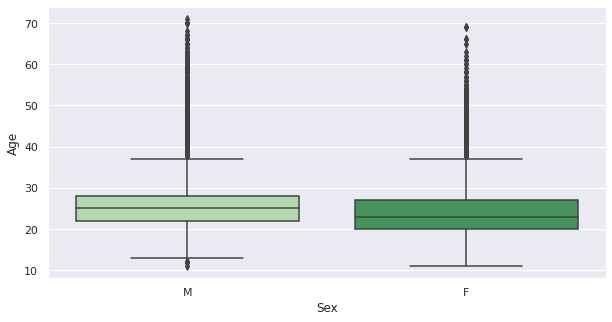

In [413]:
sns.set(rc={"figure.figsize":(10,5)})
sns.boxplot(x='Sex', y='Age', data=athlete2, palette='Greens');

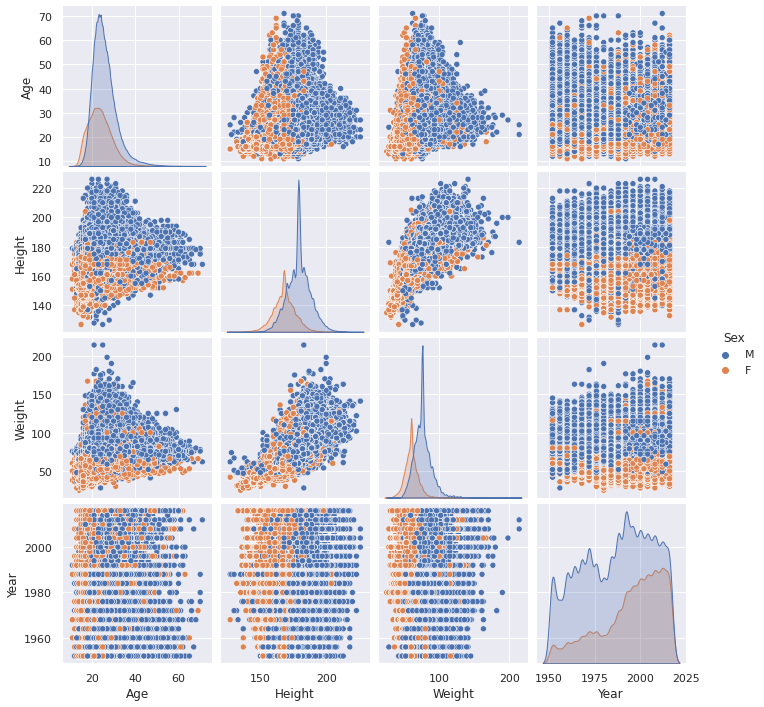

In [416]:
#plot_kws={"s":1}
sns.pairplot(athlete2, hue = 'Sex')
plt.show()

In [417]:
corr=athlete2['Height'].corr(athlete2['Weight'])
corr

0.7983697858355089

In [418]:
corr1=athlete2['Weight'].corr(athlete2['Age'])
corr1

0.21079955250702573

In [419]:
fiftyplus = merge2[(merge2['Age']>=50) & (merge2['Year']>1948)]
fiftyplus

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
128,Hans Aasns,1956,M,53.0,194.0,93.0,NOR,N,Summer,Shooting,Melbourne,5195921.0
129,Hans Aasns,1960,M,57.0,194.0,93.0,NOR,N,Summer,Shooting,Roma,5195921.0
698,Roger Abel,1952,M,52.0,NaN,NaN,MON,N,Summer,Shooting,Helsinki,37731.0
699,Roger Abel,1952,M,52.0,NaN,NaN,MON,N,Summer,Shooting,Helsinki,37731.0
1503,"Phillip Maxwell ""Phil"" Adams",1996,M,50.0,163.0,93.0,AUS,N,Summer,Shooting,Atlanta,23781169.0
...,...,...,...,...,...,...,...,...,...,...,...,...
266228,Darius Robert Young,1992,M,54.0,190.0,91.0,USA,N,Summer,Shooting,Barcelona,321418820.0
266229,Darius Robert Young,1992,M,54.0,190.0,91.0,USA,N,Summer,Shooting,Barcelona,321418820.0
267815,Jzef Zapdzki,1980,M,51.0,174.0,71.0,POL,N,Summer,Shooting,Moskva,37999494.0
268567,Xavier Zequeira Blanco,1960,M,53.0,180.0,92.0,PUR,N,Summer,Shooting,Roma,3474182.0


In [420]:
fiftyplus.dtypes

Name           object
Year            int64
Sex            object
Age           float64
Height        float64
Weight        float64
NOC            object
Medal          object
Season         object
Sport          object
City           object
Population    float64
dtype: object

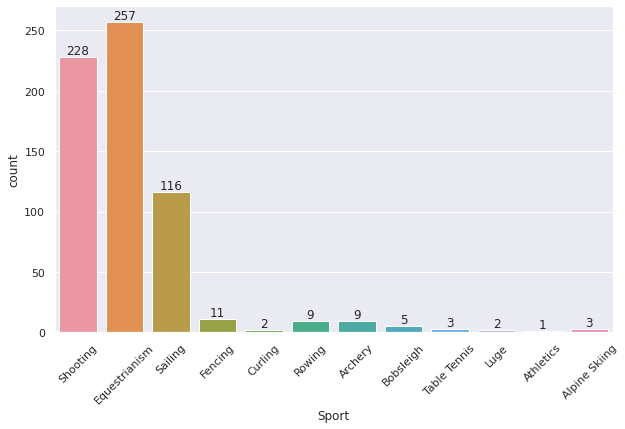

In [421]:
#print(fiftyplus[('Sport')].value_counts(dropna=True))
fig, ax=plt.subplots(figsize=(10,6))
plt.xticks(rotation=45)

ax = sns.countplot(x="Sport", data=fiftyplus);
ax.bar_label(ax.containers[0]);

In [422]:
stats = fiftyplus.groupby(['Sport'])

stats2 = stats['Age'].agg([np.mean, np.median, np.max])
stats2 = stats2.sort_values(by = 'median', ascending=False)
stats2

,mean,median,amax
Sport,,,
Sailing,54.448276,53.5,70.0
Equestrianism,54.190661,53.0,71.0
Shooting,53.951754,53.0,70.0
Table Tennis,52.333333,53.0,54.0
Luge,52.500000,52.5,53.0
Archery,53.666667,52.0,62.0
Bobsleigh,51.800000,52.0,53.0
Rowing,53.666667,52.0,60.0
Alpine Skiing,52.333333,51.0,55.0


In [423]:
athlete2 = athlete2[athlete2.Age<74]
athlete2.max()

Sex           M
Age        71.0
Height    226.0
Weight    214.0
Medal         S
Year       2016
dtype: object

In [424]:
athlete2 = athlete2[athlete2.Age<74]
athlete2.min()

Sex           F
Age        11.0
Height    127.0
Weight     25.0
Medal         B
Year       1952
dtype: object

In [425]:
top_weight = merge2[merge2['Weight'] == 214.0]
top_weight

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
23155,"Ricardo Blas, Jr.",2008,M,21.0,183.0,214.0,GUM,N,Summer,Judo,Beijing,169885.0
23156,"Ricardo Blas, Jr.",2012,M,25.0,183.0,214.0,GUM,N,Summer,Judo,London,169885.0


In [426]:
low_weight = merge2[merge2['Weight'] == 25.0]
low_weight

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
40849,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0
40850,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0
40851,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0
40852,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0
40853,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0
40854,Choi Myong-Hui,1980,F,14.0,135.0,25.0,PRK,N,Summer,Gymnastics,Moskva,25155317.0


In [427]:
top_height = merge2[merge2['Height'] == 226.0]
top_height

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
265040,Yao Ming,2000,M,20.0,226.0,141.0,CHN,N,Summer,Basketball,Sydney,1.371220e+09
265041,Yao Ming,2004,M,23.0,226.0,141.0,CHN,N,Summer,Basketball,Athina,1.371220e+09
265042,Yao Ming,2008,M,27.0,226.0,141.0,CHN,N,Summer,Basketball,Beijing,1.371220e+09


In [428]:
low_height = merge2[merge2['Height'] == 127.0]
low_height

,Name,Year,Sex,Age,Height,Weight,NOC,Medal,Season,Sport,City,Population
29333,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
29334,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
29335,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
29336,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
29337,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
29338,Rosario Briones,1968,F,15.0,127.0,42.0,MEX,N,Summer,Gymnastics,Mexico City,127017224.0
164821,Lyton Levison Mphande,1988,M,25.0,127.0,62.0,MAW,N,Summer,Boxing,Seoul,17215232.0


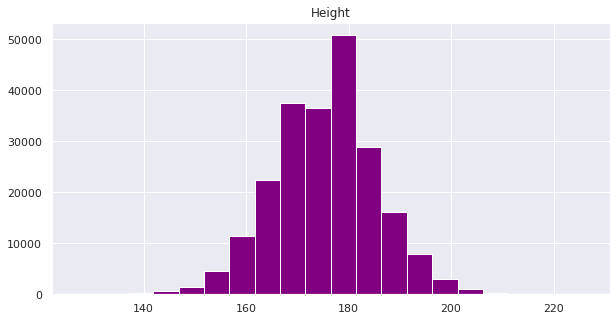

In [429]:
dataH = athlete2.hist(column='Height', bins=20, grid=True, color='purple');

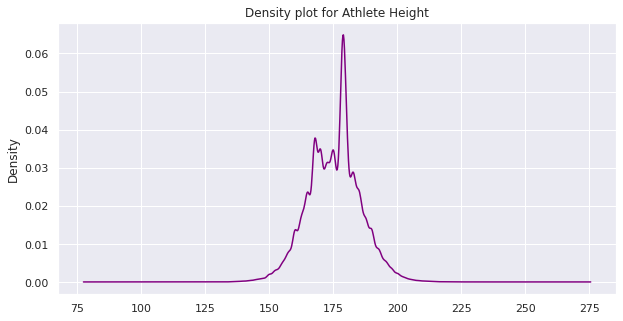

In [430]:
athlete2.Height.plot.density(color='purple')
plt.title('Density plot for Athlete Height')
plt.show()

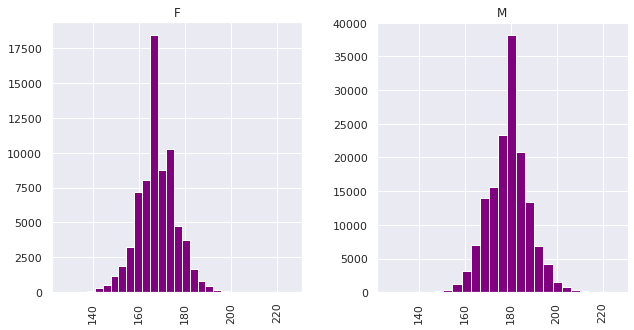

In [431]:
athlete2.hist(column='Height', by='Sex', bins=25, grid=True,color='purple', sharex=True);

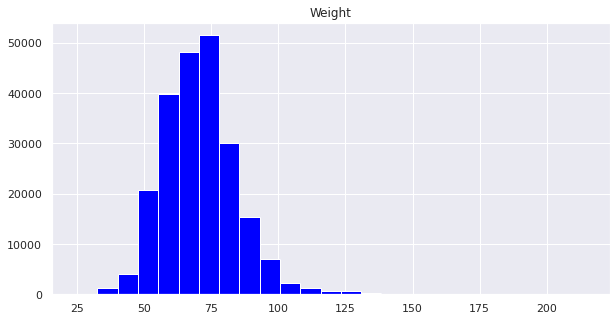

In [432]:
dataW=athlete2.hist(column='Weight', bins=25, grid=True, color='blue');


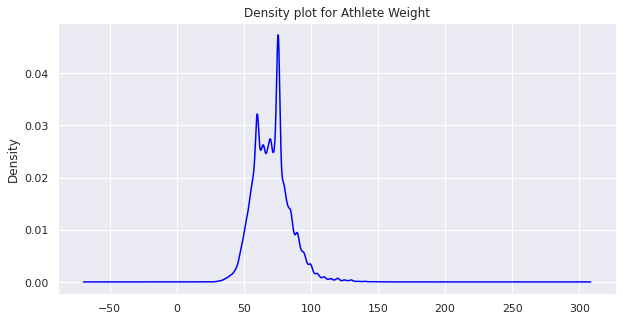

In [433]:
athlete2.Weight.plot.density(color='blue')
plt.title('Density plot for Athlete Weight')
plt.show()

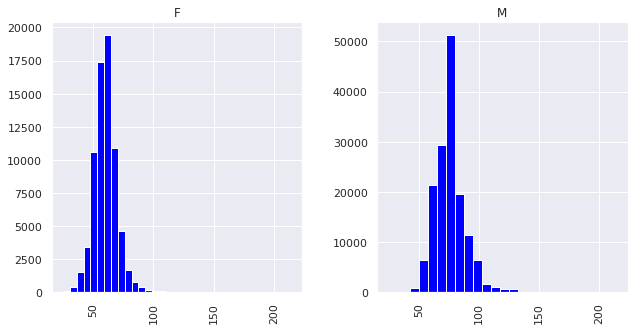

In [434]:
athlete2.hist(column='Weight', by='Sex', bins=25, grid=True,color='blue', sharex=True);

ANALYZING POPULATION WITH AND WITHOUT CHINA AND INDIA BY VIOLINPLOT

In [435]:
merge2.groupby(['Season'])['Population'].median()

Season
Summer    39032383.0
Winter    35851774.0
Name: Population, dtype: float64

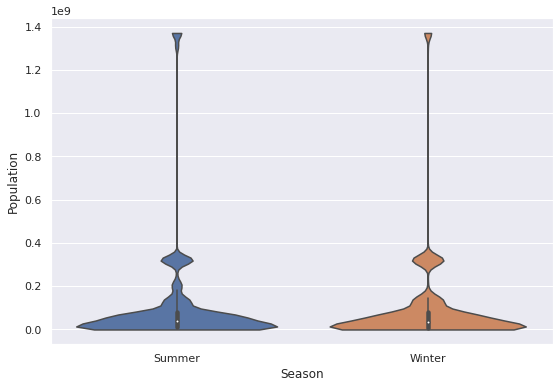

In [436]:
fig, ax=plt.subplots(figsize=(9,6))
sns.violinplot(x='Season', y='Population', cut=0, data=merge2);

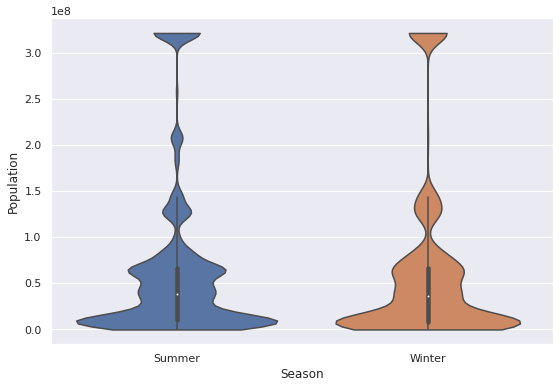

In [437]:
no_china_india = merge2[(merge2['NOC'] != 'CHN') & 
                       (merge2['NOC'] != 'IND')]
no_china_india.head
#no = merge_final.drop(df_china, inplace = True)
fig, ax=plt.subplots(figsize=(9,6))
sns.violinplot(x='Season', y='Population', cut=0, data=no_china_india);

In [438]:
no_china_india.groupby(['Season'])['Population'].median()

Season
Summer    37999494.0
Winter    35851774.0
Name: Population, dtype: float64

USSR / DURING AND AFTER

In [439]:
df_ussr = merge2.filter(['Year', 'NOC', 'Medal', 'Sport'])
df_ussr.head()

,Year,NOC,Medal,Sport
0,1992,CHN,N,Basketball
1,2012,CHN,N,Judo
2,1920,DEN,N,Football
3,1900,DEN,G,Tug-Of-War
4,1988,NED,N,Speed Skating


NOC codes for USSR and the fifteen countries that remained in 1991 after collapse
USSR URS (1922 -1991)
Unified Team EUN (russia 1992)

Armenia ARM \\
Moldova MDA \\
Estonia EST \\
Latvia LAT \\
Lithuania LTU \\
Georgia GEO \\
Azerbaijan AZE \\
Tajikistan TJK \\
Kyrgyzstan  KGZ \\
Belarus BLR \\
Uzbekistan  UZB \\
Turkmenistan TKM \\
Ukraine UKR \\
Kazakhstan KAZ \\
Russia RUS \\


In [440]:
countries = df_ussr.loc[((df_ussr['NOC'] == 'URS') | (df_ussr['NOC'] == 'ARM') | (df_ussr['NOC'] == 'MDA') | (df_ussr['NOC'] == 'EST') |
                      (df_ussr['NOC'] == 'LAT') | (df_ussr['NOC'] == 'LTU') | (df_ussr['NOC'] == 'GEO') | (df_ussr['NOC'] == 'AZE') |
                      (df_ussr['NOC'] == 'TJK') | (df_ussr['NOC'] == 'KGZ') | (df_ussr['NOC'] == 'BLR') | (df_ussr['NOC'] == 'UZB') |
                      (df_ussr['NOC'] == 'TKM') | (df_ussr['NOC'] == 'UKR') | (df_ussr['NOC'] == 'KAZ') | (df_ussr['NOC'] == 'RUS') |
                      (df_ussr['NOC'] == 'EUN'))]
countries.sample(3)

,Year,NOC,Medal,Sport
124461,2006,KAZ,N,Ski Jumping
190546,1992,EUN,G,Fencing
175974,1996,KAZ,N,Weightlifting


In [441]:
countries = countries[countries.Year>=1922]
countries["Year"].min()

1924

In [442]:
ath_num = countries.groupby('NOC').size()
ath_num

NOC
ARM     221
AZE     283
BLR    1787
EST     856
EUN     864
GEO     286
KAZ    1429
KGZ     227
LAT     951
LTU     654
MDA     234
RUS    4865
TJK      70
TKM      54
UKR    2559
URS    5685
UZB     495
dtype: int64

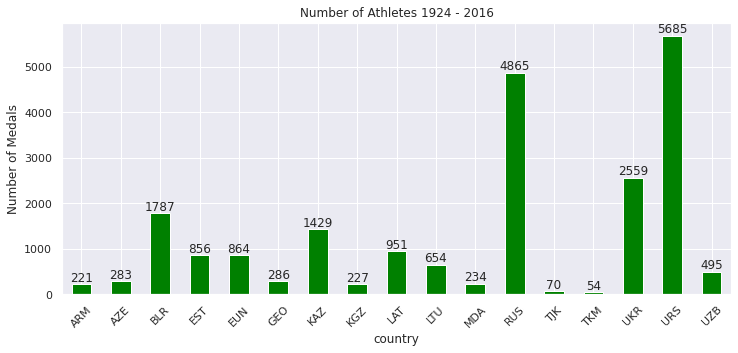

In [443]:
x = ath_num.plot.bar(x='NOC', y='Athletes', title='Number of Athletes 1924 - 2016', xlabel='country', ylabel='Number of Medals',
               figsize=(12,5),rot=45, color='green');
x.bar_label(x.containers[0]);

In [444]:
countries2 = countries.loc[((countries['Medal'] == 'G') | (countries['Medal'] == 'S') | (countries['Medal'] == 'B'))]
countries2.sample(3)               


,Year,NOC,Medal,Sport
164913,1960,URS,S,Water Polo
120020,1988,URS,S,Canoeing
160084,1968,URS,G,Ice Hockey


In [445]:
medal = countries2.groupby('NOC').size()
medal


NOC
ARM      16
AZE      44
BLR     139
EST      47
EUN     279
GEO      32
KAZ      77
KGZ       3
LAT      35
LTU      61
MDA       8
RUS    1148
TJK       4
UKR     199
URS    2503
UZB      34
dtype: int64

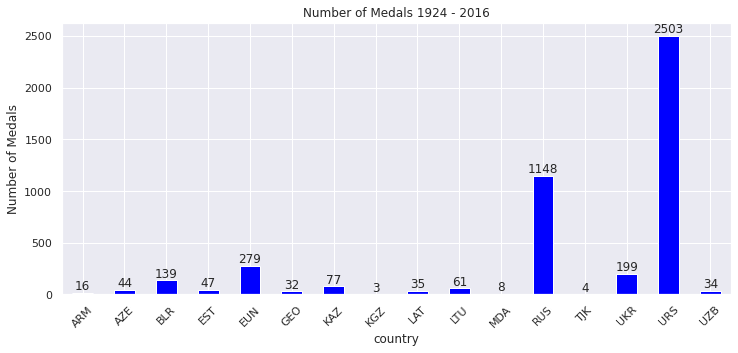

In [446]:
x = medal.plot.bar(x='NOC', y='Medal', title='Number of Medals 1924 - 2016', xlabel='country', ylabel='Number of Medals',
               figsize=(12,5),rot=45, color='blue');
x.bar_label(x.containers[0]);

In [447]:
sov_data = [['ARM', 221, 16], ['AZE', 283, 44], ['BLR', 1787, 139], ['EST', 856, 47], ['EUN', 864, 279],
['GEO', 286, 32], ['KAZ', 1429, 77], ['KGZ', 227, 3], ['LAT', 951, 35], ['LTU', 654, 61],
['MDA', 234, 8], ['RUS', 4865, 1148], ['TJK', 70, 4], ['TKM', 54, 0], ['UKR', 2559, 199], ['URS', 5685, 2503],
['UZB', 495, 34]]
df_soviet = pd.DataFrame(sov_data, columns = ['Country', 'NumAth', 'NumMed'])
df_soviet.sample(5)

,Country,NumAth,NumMed
0,ARM,221,16
7,KGZ,227,3
16,UZB,495,34
4,EUN,864,279
13,TKM,54,0


In [448]:
df_soviet['medal_percent'] = (((df_soviet['NumMed'])/(df_soviet['NumAth']))*100)
df_soviet['medal_percent'] = df_soviet['medal_percent'].round(decimals = 2)
df_soviet.sample(5)

,Country,NumAth,NumMed,medal_percent
13,TKM,54,0,0.00
10,MDA,234,8,3.42
14,UKR,2559,199,7.78
16,UZB,495,34,6.87
4,EUN,864,279,32.29


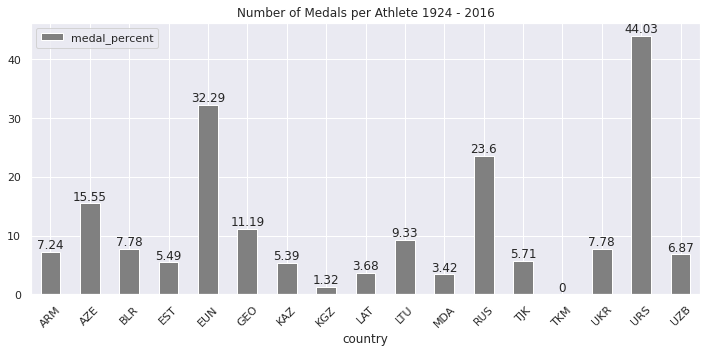

In [449]:
m = df_soviet.plot.bar(x='Country', y='medal_percent', title='Number of Medals per Athlete 1924 - 2016', xlabel='country',
               figsize=(12,5),rot=45, color='gray');
m.bar_label(m.containers[0]);

Athletics                855
Gymnastics               797
Swimming                 471
Rowing                   321
Fencing                  279
Cross Country Skiing     247
Speed Skating            222
Ice Hockey               168
Equestrianism            162
Wrestling                160
Cycling                  151
Basketball               146
Volleyball               141
Canoeing                 141
Shooting                 139
Sailing                  110
Alpine Skiing            109
Football                 102
Diving                   100
Handball                  99
Water Polo                99
Boxing                    96
Figure Skating            94
Weightlifting             71
Biathlon                  63
Modern Pentathlon         54
Ski Jumping               54
Luge                      47
Hockey                    47
Nordic Combined           35
Judo                      31
Archery                   25
Bobsleigh                 24
Tennis                    10
Table Tennis  

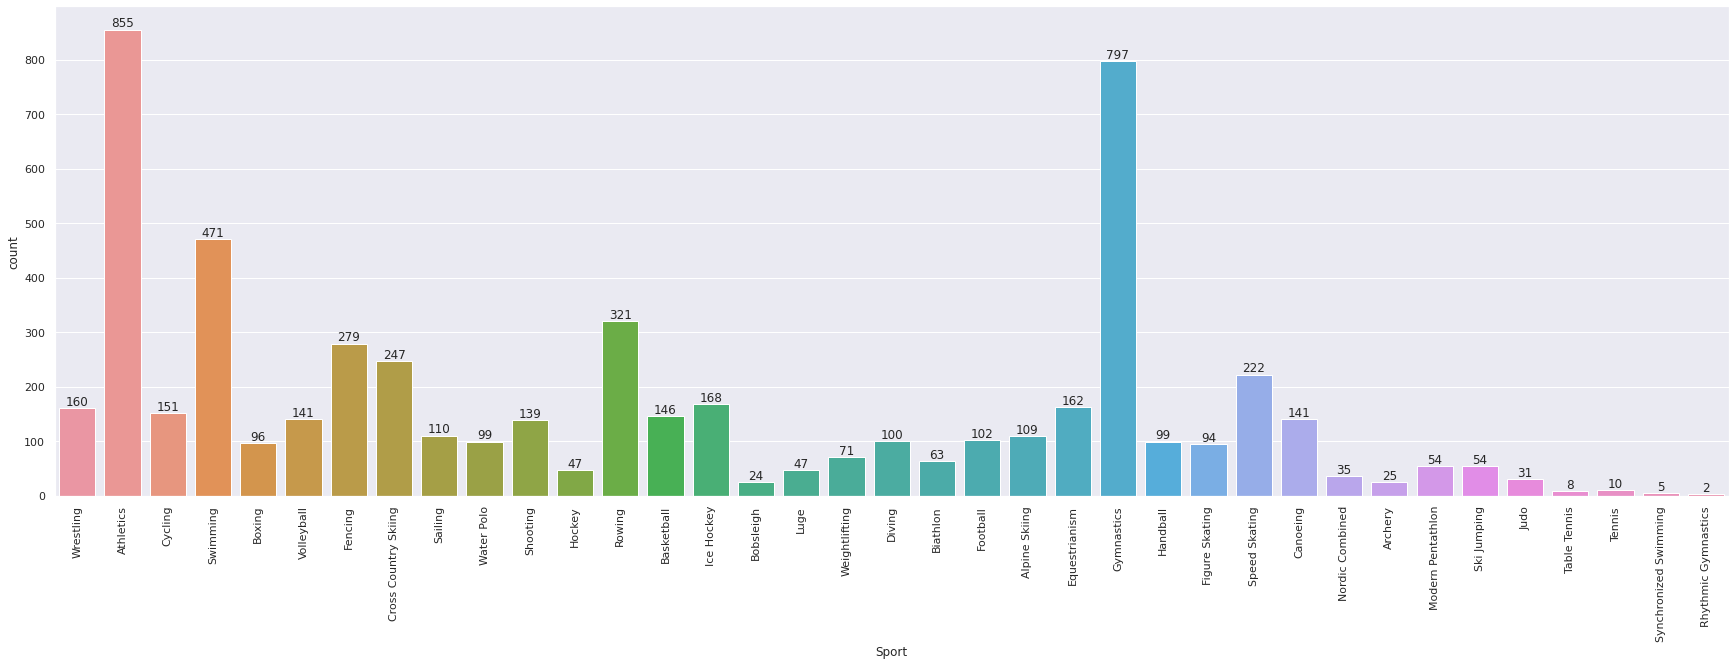

In [450]:
ussr_only = merge2.loc[(merge2['NOC'] == 'URS')]
print(ussr_only[('Sport')].value_counts(dropna=True))
fig, ax=plt.subplots(figsize=(30,9))
plt.xticks(rotation=90)

sp = sns.countplot(x="Sport", data=ussr_only);
sp.bar_label(sp.containers[0]);

Athletics                    432
Gymnastics                   429
Wrestling                    309
Ice Hockey                   233
Fencing                      233
Basketball                   229
Volleyball                   219
Rowing                       218
Swimming                     209
Cross Country Skiing         183
Handball                     182
Weightlifting                156
Canoeing                     155
Boxing                       150
Water Polo                   142
Biathlon                     122
Shooting                     113
Figure Skating               108
Cycling                       91
Football                      87
Speed Skating                 82
Judo                          75
Rhythmic Gymnastics           75
Synchronized Swimming         54
Diving                        48
Modern Pentathlon             45
Sailing                       43
Hockey                        32
Equestrianism                 29
Bobsleigh                     24
Archery   

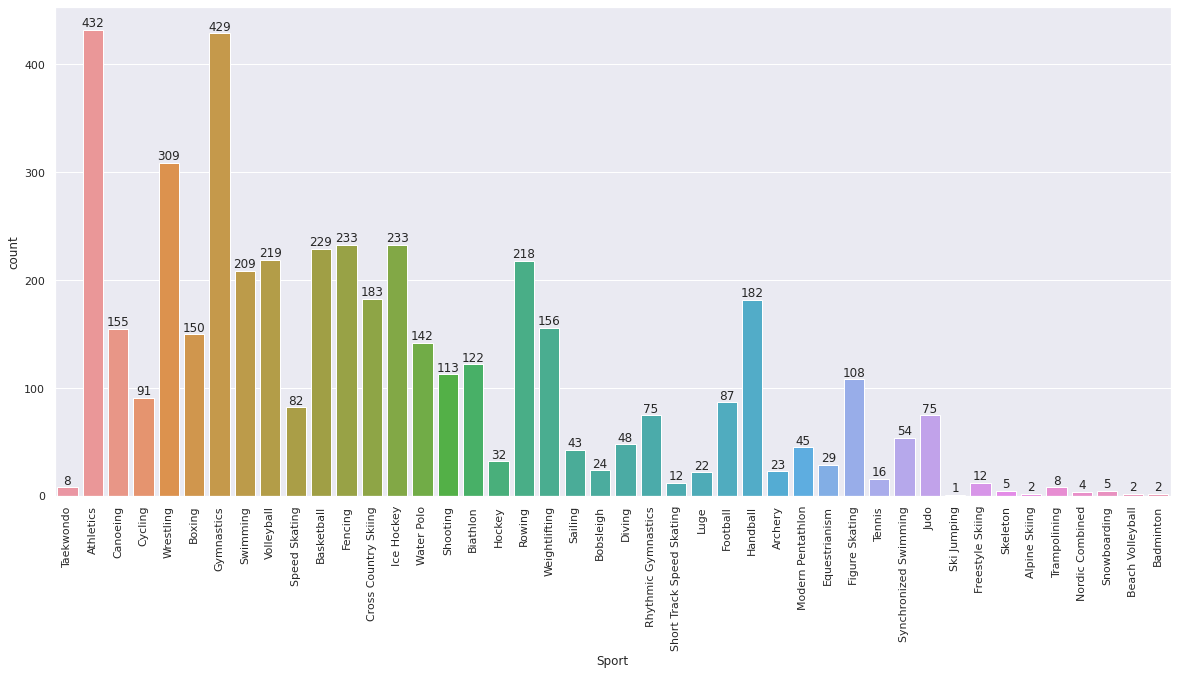

In [451]:
ussr_only2 = countries2[['Sport','Medal']].copy()
ussr_only2

print(ussr_only2[('Sport')].value_counts(dropna=True))
fig, ax=plt.subplots(figsize=(20,9))
plt.xticks(rotation=90)

v = sns.countplot(x="Sport",data=ussr_only2);
v.bar_label(v.containers[0]);
